In [3]:
import pandas as pd
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics 

BTC_df=pd.read_csv('Practice_datasets\crypto\BTC.csv')
ETH_df=pd.read_csv('Practice_datasets\crypto\ETH.csv')

BTC_df.head()

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


In [11]:
BTC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  5242 non-null   object 
 1   date    5242 non-null   object 
 2   open    5242 non-null   float64
 3   high    5242 non-null   float64
 4   low     5242 non-null   float64
 5   close   5242 non-null   float64
dtypes: float64(4), object(2)
memory usage: 245.8+ KB


In [6]:
BTC_df.values


array([['2015-08-07', 3.0, 3.0],
       ['2015-08-08', 3.0, 1.2],
       ['2015-08-09', 1.2, 1.2],
       ...,
       ['2024-11-19', 3226.43, 3069.69],
       ['2024-11-20', 3161.34, 3032.23],
       ['2024-11-21', 3390.25, 3035.15]], dtype=object)

In [51]:
#So we need to drop the ticker,because they are not important for our model.

BTC_df = BTC_df.drop(columns = ["ticker","open","close"],axis =1)
ETH_df = ETH_df.drop(columns = ["ticker","open","close"],axis =1)

ETH_df.head()

,date,high,low
0,2015-08-07,3.0,3.0000
1,2015-08-08,3.0,1.2000
2,2015-08-09,1.2,1.2000
3,2015-08-10,1.2,1.2000
4,2015-08-11,1.2,0.6504


## Now we wanna plot BTC prices locked to the halving events


In [52]:
import matplotlib.pyplot as plt

# Specify the four specific halving-event dates
specific_dates = ['2012-11-28','2016-07-09', '2020-05-11', '2024-04-19'] # these are actual BTC halving event dates
specific_dates = pd.to_datetime(specific_dates)
BTC_df['date'] = pd.to_datetime(BTC_df['date'])
ETH_df['date'] = pd.to_datetime(ETH_df['date'])

specific_dates.values # what does datetime do?


array(['2012-11-28T00:00:00.000000000', '2016-07-09T00:00:00.000000000',
       '2020-05-11T00:00:00.000000000', '2024-04-19T00:00:00.000000000'],
      dtype='datetime64[ns]')

### Create a plot for each specific date

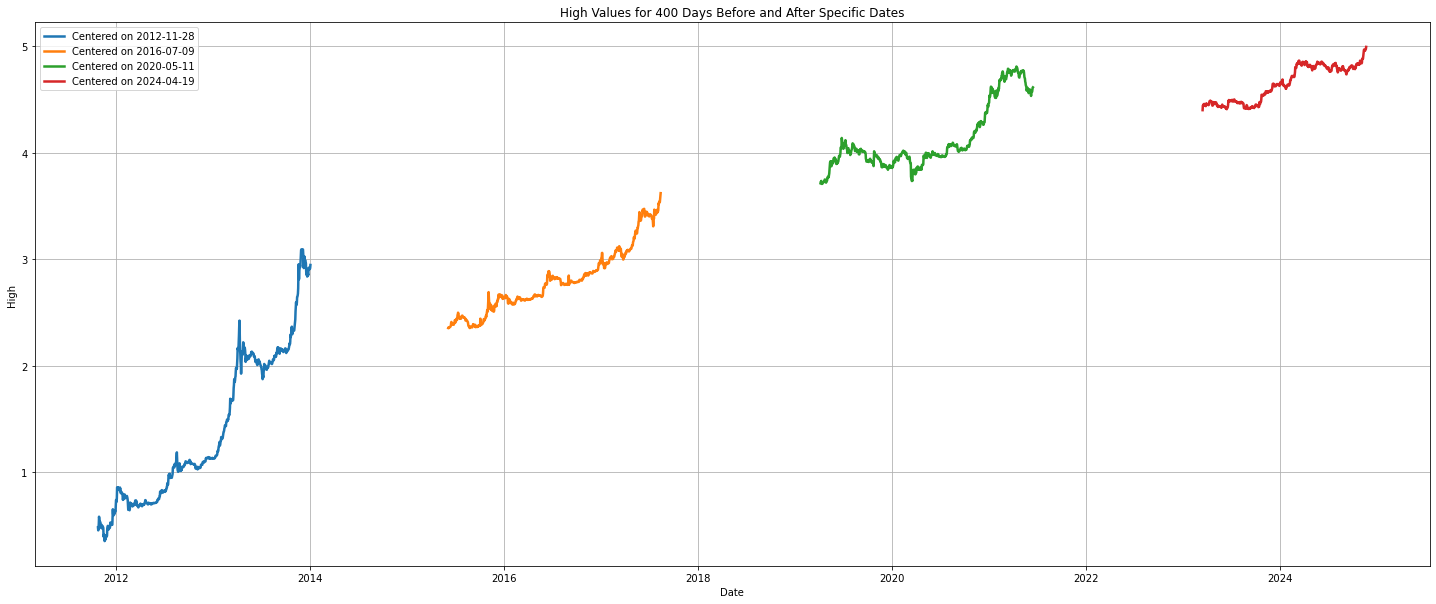

In [43]:
plt.figure(figsize=(10*2.5, 4*2.5)) # width and height of the figure in cm instead of inches

for date in specific_dates:
    # Define the range for 400 days before and after
    start_date = date - pd.Timedelta(days=400)
    end_date = date + pd.Timedelta(days=400)
    
    # Filter the DataFrame for the 400 day period around the halving events
    filtered_data = BTC_df[(BTC_df['date'] >= start_date) & (BTC_df['date'] <= end_date)]
    filtered_data = filtered_data[filtered_data['high'] > 0]
    filtered_data['highlog']=np.log10(filtered_data['high'])
    # Plot the data
    plt.plot(filtered_data['date'], filtered_data['highlog'], label=f"Centered on {date.date()}",linewidth=2.5)

# Add plot details
plt.title('High Values for 400 Days Before and After Specific Dates')
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()
plt.grid(True)
plt.show()

### It seems like there is a consistent upward pattern around the halving events. Lets plot these values on the same axis

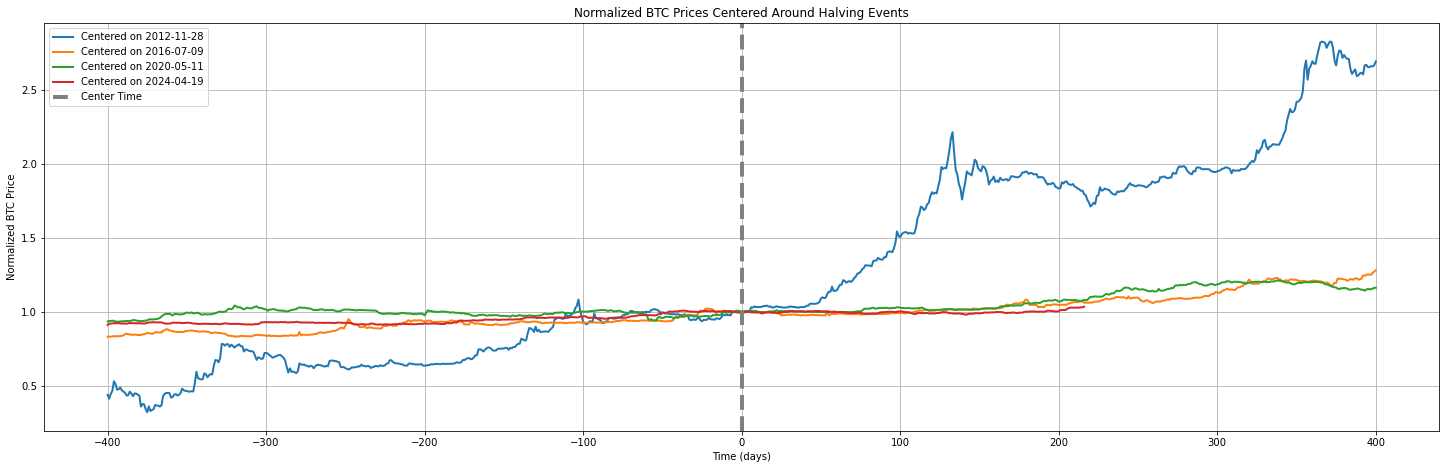

,date,high,low,highlog,time_offset,normalized_high
4625,2023-03-16,25224.9,24212.8,4.401829,-400,0.913972
4626,2023-03-17,27827.2,24944.7,4.444470,-399,0.922826
4627,2023-03-18,27778.6,26730.5,4.443710,-398,0.922668
4628,2023-03-19,28472.0,26887.8,4.454418,-397,0.924892
4629,2023-03-20,28553.4,27223.3,4.455658,-396,0.925149


In [36]:
# Initialize the plot
plt.figure(figsize=(10*2.5, 3*2.5)) # width and height of the figure in cm instead of inches

# Process and plot for each center_date
for center_date in specific_dates:
    # Define the range for 400 days before and after
    start_date = center_date - pd.Timedelta(days=400)
    end_date = center_date + pd.Timedelta(days=400)
    
    # Filter the DataFrame for the 400 day period around the halving events
    filtered_data = BTC_df[(BTC_df['date'] >= start_date) & (BTC_df['date'] <= end_date)]
    filtered_data = filtered_data[filtered_data['high'] > 0]
    filtered_data['highlog']=np.log10(filtered_data['high'])
    # Calculate the time offset (in days)
    filtered_data['time_offset'] = (filtered_data['date'] - center_date).dt.days # dt.days turnes dates from date format to digits
    
    # Normalize the 'high' values
    center_high_value = filtered_data.loc[filtered_data['date'] == center_date, 'highlog'].values[0] # pick the value of
    # the log of BTC-'high' at the halving event time 
    filtered_data['normalized_high'] = filtered_data['highlog'] / center_high_value # normalize the values of BTC-'high' by the 
    # value at the halving event
    
    # Plot the normalized values with the time offset as x-axis
    plt.plot(filtered_data['time_offset'], filtered_data['normalized_high'], label=f"Centered on {center_date.date()}"
            ,linewidth=2)

# Add plot details
plt.title('Normalized BTC Prices Centered Around Halving Events')
plt.xlabel('Time (days)')
plt.ylabel('Normalized BTC Price')
plt.axvline(0, color='gray', linestyle='--', label='Center Time', linewidth=4)
plt.legend()
plt.grid(True)
plt.show()

filtered_data.head() # and to see what is the content of filtered_data


### And now similarly, ETH price locked to the halving events

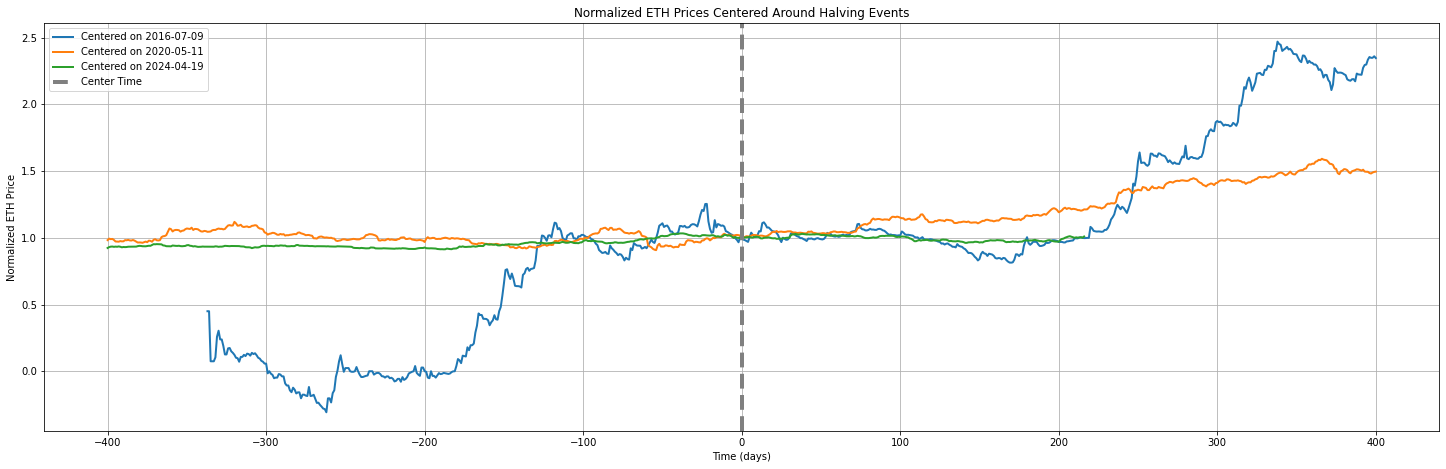

,date,high,low,highlog
4625,2023-03-16,25224.9,24212.8,4.401829
4626,2023-03-17,27827.2,24944.7,4.444470
4627,2023-03-18,27778.6,26730.5,4.443710
4628,2023-03-19,28472.0,26887.8,4.454418
4629,2023-03-20,28553.4,27223.3,4.455658


In [54]:
# Initialize the plot
plt.figure(figsize=(10*2.5, 3*2.5)) # width and height of the figure in cm instead of inches

# Process and plot for each center_date
for center_date in specific_dates[1:4]:
    # Define the range for 400 days before and after
    start_date = center_date - pd.Timedelta(days=400)
    end_date = center_date + pd.Timedelta(days=400)
    
    # Filter the DataFrame for the 400-day period around the halving events
    filtered_data_ = ETH_df[(ETH_df['date'] >= start_date) & (ETH_df['date'] <= end_date)]
    filtered_data_ = filtered_data_[filtered_data_['high'] > 0]
    filtered_data_['highlog']=np.log10(filtered_data_['high'])
    # Calculate the time offset (in days)
    filtered_data_['time_offset'] = (filtered_data_['date'] - center_date).dt.days # dt.days turnes dates from date format to digits
    
    # Normalize the 'high' values
    center_high_value = filtered_data_.loc[filtered_data_['date'] == center_date, 'highlog'].values[0] # pick the value of
    # the log of ETH-'high' at the halving event time 
    filtered_data_['normalized_high'] = filtered_data_['highlog'] / center_high_value # normalize the values of ETH-'high' by the 
    # value at the halving event
    
    # Plot the normalized values with the time offset as x-axis
    plt.plot(filtered_data_['time_offset'], filtered_data_['normalized_high'], label=f"Centered on {center_date.date()}"
            ,linewidth=2)

# Add plot details
plt.title('Normalized ETH Prices Centered Around Halving Events')
plt.xlabel('Time (days)')
plt.ylabel('Normalized ETH Price')
plt.axvline(0, color='gray', linestyle='--', label='Center Time', linewidth=4)
plt.legend()
plt.grid(True)
plt.show()

filtered_data.head() # and to see what is the content of filtered_data

## Now we want to compute and visualize the correlation between the cryto currencies

In [5]:
# Import necessary libraries
import os  # For working with file directories
import seaborn as sns  # For advanced plotting

# 1. Set the folder where your CSV files are located
# Replace 'your_folder_path' with the path to the folder containing your CSV files
folder_path = 'D:\Python\Samples_VS\pythonLearning\JupyterFiles\Practice_datasets\crypto'

# 2. Create an empty dictionary to store data from each CSV file
# The keys will be the cryptocurrency names, and the values will be the dataframes
crypto_data = {}

# 3. Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Ensure we're only processing CSV files
        file_path = os.path.join(folder_path, filename)  # Get the full path of the file
        
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Extract the cryptocurrency name from the filename (remove .csv extension)
        crypto_name = filename[:-4]
        
        crypto_data[crypto_name] = df['high'][::-1]  # Reverse the order, since this way the last-day appears first and so on.
        # This way, for all cryptoes, we have the last-day price first, and then previos day and so on.
        # This time-alignment is important because for each crypto we have different number of days available.
        # So we cannot align them based on the first day in the chronological order, as some of them have been
        #created more recently than the others. 
        
# 4. Combine all data into a single DataFrame
# Use the cryptocurrency names as column names
all_data = pd.DataFrame(crypto_data)
all_data.head()
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Columns: 120 entries, 1INCH to ZRX
dtypes: float64(120)
memory usage: 4.8 MB


In [12]:
# 5. Compute the correlation matrix
correlation_matrix = all_data.iloc[::].corr()
type(correlation_matrix)



pandas.core.frame.DataFrame

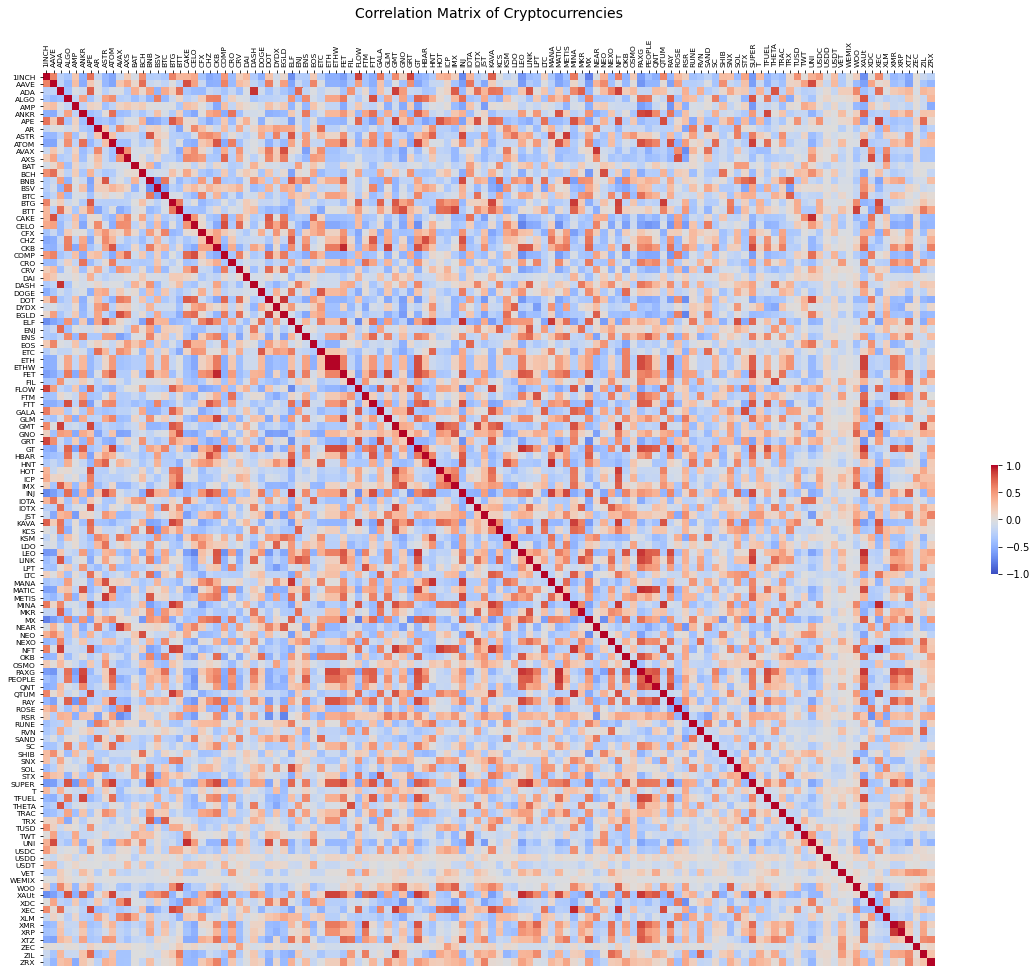

In [34]:
# 6. Plot the correlation matrix
plt.figure(figsize=(20, 20))  # Set a large figure size to accommodate the matrix and labels
ax = sns.heatmap(
    correlation_matrix,  # The correlation matrix
    annot=False,         # Do not annotate each cell
    cmap='coolwarm',     # Color map for the heatmap
    square=True,         # Force the heatmap cells to be square
    cbar_kws={"shrink": 0.1, "aspect": 15},  # Shrink the color bar and set its aspect ratio
    vmin=-1,             # Set the minimum value for the colormap
    vmax=1,              # Set the maximum value for the colormap
    xticklabels=1,       # Show all column labels
    yticklabels=1        # Show all row labels
)

# Move x-axis labels to the top
ax.xaxis.tick_top()

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90, fontsize=7.5)  # Vertical x-axis labels with small font
plt.yticks(fontsize=7.5)  # Keep y-axis labels horizontal but small

plt.title('Correlation Matrix of Cryptocurrencies', fontsize=14, pad=20)  # Add some padding for the title
plt.show()  # Display the plot
